In [1]:
#import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

#Ignore all warnings
import warnings
warnings.filterwarnings("ignore")


In [2]:
#load and preview file
df = pd.read_excel("data.xlsx")
df

,id,age,age1bir,racethn,educatn,marital,kidshh,poverty,ervisit,docvisit,...,births,miscarr,totpregs,drunk,usedpot,usedcrck,FeltDown,PhysicalHlth,MentalHlth,MEIS
0,12001,27,23.0,White not Hispanic,Diploma or GED,Divorced,2,Below poverty,3,10,...,2,0,2,Never,Never,Never,None of the time,27.392,39.927,3.835
1,12002,21,NaN,Black not Hispanic,No high school diploma,Never married,0,Below poverty,0,2,...,6,0,7,Never,Never,Never,Some of the time,40.366,43.756,1.117
2,12003,44,16.0,Black not Hispanic,Diploma or GED,Divorced,7,Below poverty,1,1,...,8,1,9,Never,Never,Never,Some of the time,37.136,55.862,0.668
3,12004,27,18.0,Black not Hispanic,Diploma or GED,Married,2,Below poverty,1,0,...,2,2,4,Never,Once or twice,Never,Some of the time,46.609,51.807,2.441
4,12005,40,25.0,Black not Hispanic,No high school diploma,Never married,2,Below poverty,2,1,...,4,1,6,Never,Never,Never,Some of the time,32.329,49.068,1.931
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
945,12946,36,17.0,Black not Hispanic,Diploma or GED,Never married,4,Below poverty,0,2,...,4,0,4,Never,Never,Never,None of the time,56.577,60.758,0.716
946,12947,37,18.0,Black not Hispanic,No high school diploma,Never married,2,Below poverty,0,4,...,2,1,4,3+ times,3+ times,Never,Most of the time,59.339,47.969,1.360
947,12948,40,16.0,Black not Hispanic,Diploma or GED,Never married,2,Below poverty,2,1,...,3,2,5,Once or twice,Once or twice,Never,Some of the time,40.758,31.346,0.199
948,12949,35,20.0,Hispanic,No high school diploma,Never married,4,Below poverty,0,12,...,5,0,8,Once or twice,Never,Never,Most of the time,48.017,23.168,2.527


# Data Understanding


In [3]:
#description of columns 
#check metadata for more understanding
df.columns

Index(['id', 'age', 'age1bir', 'racethn', 'educatn', 'marital', 'kidshh',
       'poverty', 'ervisit', 'docvisit', 'smoker', 'Height', 'Weight', 'bmi',
       'births', 'miscarr', 'totpregs', 'drunk', 'usedpot', 'usedcrck',
       'FeltDown', 'PhysicalHlth', 'MentalHlth', 'MEIS'],
      dtype='object')

In [4]:
#check general information/ data description
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 950 entries, 0 to 949
Data columns (total 24 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            950 non-null    int64  
 1   age           950 non-null    int64  
 2   age1bir       883 non-null    float64
 3   racethn       950 non-null    object 
 4   educatn       950 non-null    object 
 5   marital       950 non-null    object 
 6   kidshh        950 non-null    int64  
 7   poverty       950 non-null    object 
 8   ervisit       950 non-null    int64  
 9   docvisit      950 non-null    object 
 10  smoker        950 non-null    object 
 11  Height        950 non-null    int64  
 12  Weight        950 non-null    int64  
 13  bmi           948 non-null    float64
 14  births        950 non-null    int64  
 15  miscarr       950 non-null    int64  
 16  totpregs      950 non-null    int64  
 17  drunk         950 non-null    object 
 18  usedpot       950 non-null    

The summary informs data is composed of 950 entries, 24 columns, and the following datatypes float64(5), int64(9), object(10).    
The data occupies a memory of 178.2+kb.    
We also have values missing in bmi and age1bir columns.

In [5]:
#check duplicates
df.duplicated().sum()

0

# Data Cleaning

In [6]:
# delete id column not necessary 
df.drop(columns = "id", inplace= True)

In [7]:
# filling missing values in bmi and age1birth columns
df[["bmi","age1bir"]].isna().sum()

bmi         2
age1bir    67
dtype: int64

In [8]:
#Statistical summary of the two columns 
#to aid in filling missing values
df[["bmi","age1bir"]].describe().T

,count,mean,std,min,25%,50%,75%,max
bmi,948.0,29.167131,7.363334,14.54,23.97,27.97,32.64,60.13
age1bir,883.0,19.557191,3.703872,11.00,17.00,19.00,21.00,42.00


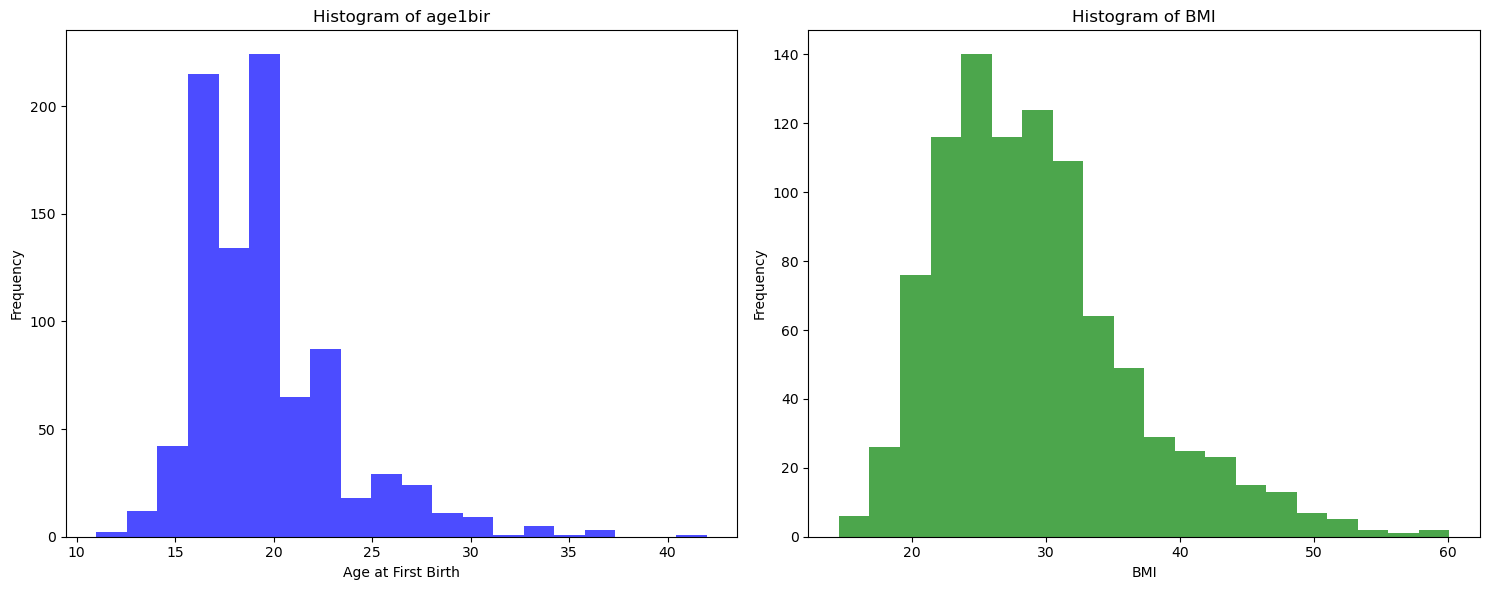

In [9]:
#visualize distribution of bmi and age1bir
#plot subplots
fig, axs =plt.subplots(1,2, figsize =(15,6))

# Plot histogram for 'age1bir' in the first subplot (axs[0])
axs[0].hist(df["age1bir"], bins=20, color='blue', alpha=0.7)
axs[0].set_title('Histogram of age1bir')
axs[0].set_xlabel('Age at First Birth')
axs[0].set_ylabel('Frequency')

# Plot histogram for 'bmi' in the second subplot (axs[1])
axs[1].hist(df["bmi"], bins=20, color='green', alpha=0.7)
axs[1].set_title('Histogram of BMI')
axs[1].set_xlabel('BMI')
axs[1].set_ylabel('Frequency')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

The distibution of both graphs is a skew on the right.   
Replace missing values with median because If your data is skewed, using the median to fill missing values can help maintain the typical central tendency without being heavily influenced by extreme values in the tail. 

In [10]:
#fill missing values 
df["bmi"].fillna(df["bmi"].median(), inplace =True )
df["age1bir"].fillna(df["age1bir"].median(),inplace= True)

In [11]:
print("Missing value for bmi:", df["bmi"].isna().sum(),"\nMissing value for age1bir:", df["age1bir"].isna().sum())
print("Dataset is ready for analysis and modelling")

Missing value for bmi: 0 
Missing value for age1bir: 0
Dataset is ready for analysis and modelling


# Data Analysis(Exploration)

In [12]:
#preview first 4 observations of the dataset
df.head(4)

,age,age1bir,racethn,educatn,marital,kidshh,poverty,ervisit,docvisit,smoker,...,births,miscarr,totpregs,drunk,usedpot,usedcrck,FeltDown,PhysicalHlth,MentalHlth,MEIS
0,27,23.0,White not Hispanic,Diploma or GED,Divorced,2,Below poverty,3,10,No,...,2,0,2,Never,Never,Never,None of the time,27.392,39.927,3.835
1,21,19.0,Black not Hispanic,No high school diploma,Never married,0,Below poverty,0,2,Yes,...,6,0,7,Never,Never,Never,Some of the time,40.366,43.756,1.117
2,44,16.0,Black not Hispanic,Diploma or GED,Divorced,7,Below poverty,1,1,No,...,8,1,9,Never,Never,Never,Some of the time,37.136,55.862,0.668
3,27,18.0,Black not Hispanic,Diploma or GED,Married,2,Below poverty,1,0,No,...,2,2,4,Never,Once or twice,Never,Some of the time,46.609,51.807,2.441


#### 1. Understanding Age distribution    
important to understand the composition of the population represented by the sample

In [13]:
#unique ages of samples
print("Ages: " , df["age"].unique())

#group observations into groups based on their age 
Agebelow20 = []
Agebelow30 = []
Ageabove30 = []

def grouping_byAge(age):
    if age < 20:
        Agebelow20.append(age)
    elif age >20 and age <30:
        Agebelow30.append(age)
    else:
        Ageabove30.append(age)
# Apply the grouping function to each age in the DataFrame
df['age'].apply(grouping_byAge)

#Access the grouped ages by count
count_below20 = len(Agebelow20)
count_between20and30 = len(Agebelow30)
count_above30 = len(Ageabove30)


#View the counts of age groups
print("Count of ages below 20:", count_below20)
print("Count of ages between 20 and 30:", count_between20and30)
print("Count of ages above 30:", count_above30) 


Ages:  [27 21 44 40 36 28 33 38 25 29 24 49 48 26 45 47 23 32 22 46 43 42 41 39
 37 35 34 31 30 19]
Count of ages below 20: 1
Count of ages between 20 and 30: 146
Count of ages above 30: 803


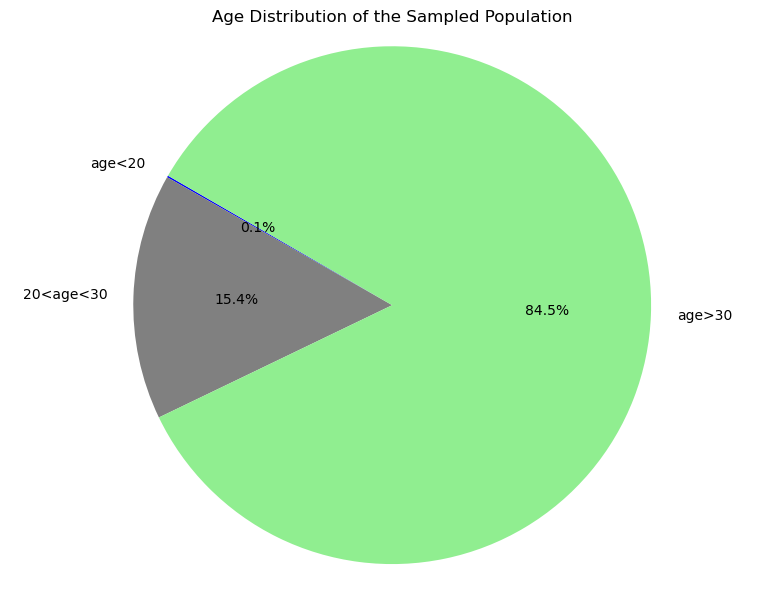

In [14]:
#visualize the age groups using a pie chart
#categorize data
grouped_ages = [count_below20,count_between20and30,count_above30]

#colours for the categorized data
colors = ["blue","grey","lightgreen"]

#create labels for the categories
labeling = ["age<20","20<age<30","age>30"]

# Plotting the pie chart
plt.figure(figsize=(8, 6))  # Adjust size if needed
plt.pie(grouped_ages, labels=labeling, colors=colors, autopct='%1.1f%%', startangle=150)
plt.title('Age Distribution of the Sampled Population')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Display the plot
plt.tight_layout()
plt.show()

Inferences:   
Of the sampled population, it appears that the a majority of the population is above 30 years of age. Only 0.1% represented those below 19 years of age. Individuals above 30 years participated more in the study giving an impression that demographic is made of individuals above 30 years of age and those between 20 and 30. The distribution informed further analysis and modelling focusing on only two groups,those between 20 and 30, and those above 30 years since they formed a larger portion of the population. 

#### 2. Understanding other Demographics of the sampled population: Focus on the two major Age groups

In [30]:
#Select features that compose a demographic traits
demographics_df = df[['age', 'age1bir', 'racethn', 'educatn', 'marital', 'kidshh',
                    'poverty', 'ervisit', 'docvisit', 'smoker', 'bmi','births', 
                    'miscarr', 'totpregs', 'drunk','FeltDown', 'PhysicalHlth', 'MentalHlth']]

#Group data into two main age groups
#group age between 20 and 30
age_20_30 = demographics_df[(demographics_df['age'] >= 20) & (demographics_df['age'] <= 30)]

# group age above 30
age_above30 = demographics_df[(demographics_df["age"])>=30]


#### 2.1 Demographics Analysis of Age between 20 and 30

In [23]:
#Number of samples aged between 20 and 30
age_20_30.shape

(166, 18)

In [27]:
#columns in this age group
age_20_30.columns

Index(['age', 'age1bir', 'racethn', 'educatn', 'marital', 'kidshh', 'poverty',
       'ervisit', 'docvisit', 'smoker', 'bmi', 'births', 'miscarr', 'totpregs',
       'drunk', 'FeltDown', 'PhysicalHlth', 'MentalHlth'],
      dtype='object')

In [35]:
def value_counts_plot(data, column):
    """
    This functions generates the value counts for every column in the data
    The generated value counts are then plotted for demographic visualization
    
    Parameters:
    - data: respective DataFrame
    - column: desired columns in the data
    
    Functions uses a bar plot.
    """
    num_cols = len(columns)
    num_rows = math.ceil(num_cols / 2)  # Calculate number of rows needed
    
    plt.figure(figsize=(16, 4 * num_rows))  # Adjust figure size based on number of rows
    
    for i, col in enumerate(columns, start=1):
        plt.subplot(num_rows, 4, i)  # Adjust subplot layout based on number of columns
        value_counts = df[col].value_counts()
        value_counts.plot(kind='bar', color='lightblue', alpha=0.8)
        plt.title(f'Value Counts for {col}')
        plt.xlabel('Unique Values(Categories')
        plt.ylabel('Value Counts')
        plt.xticks(rotation=45)  # Rotate x-axis labels if needed
        plt.tight_layout()


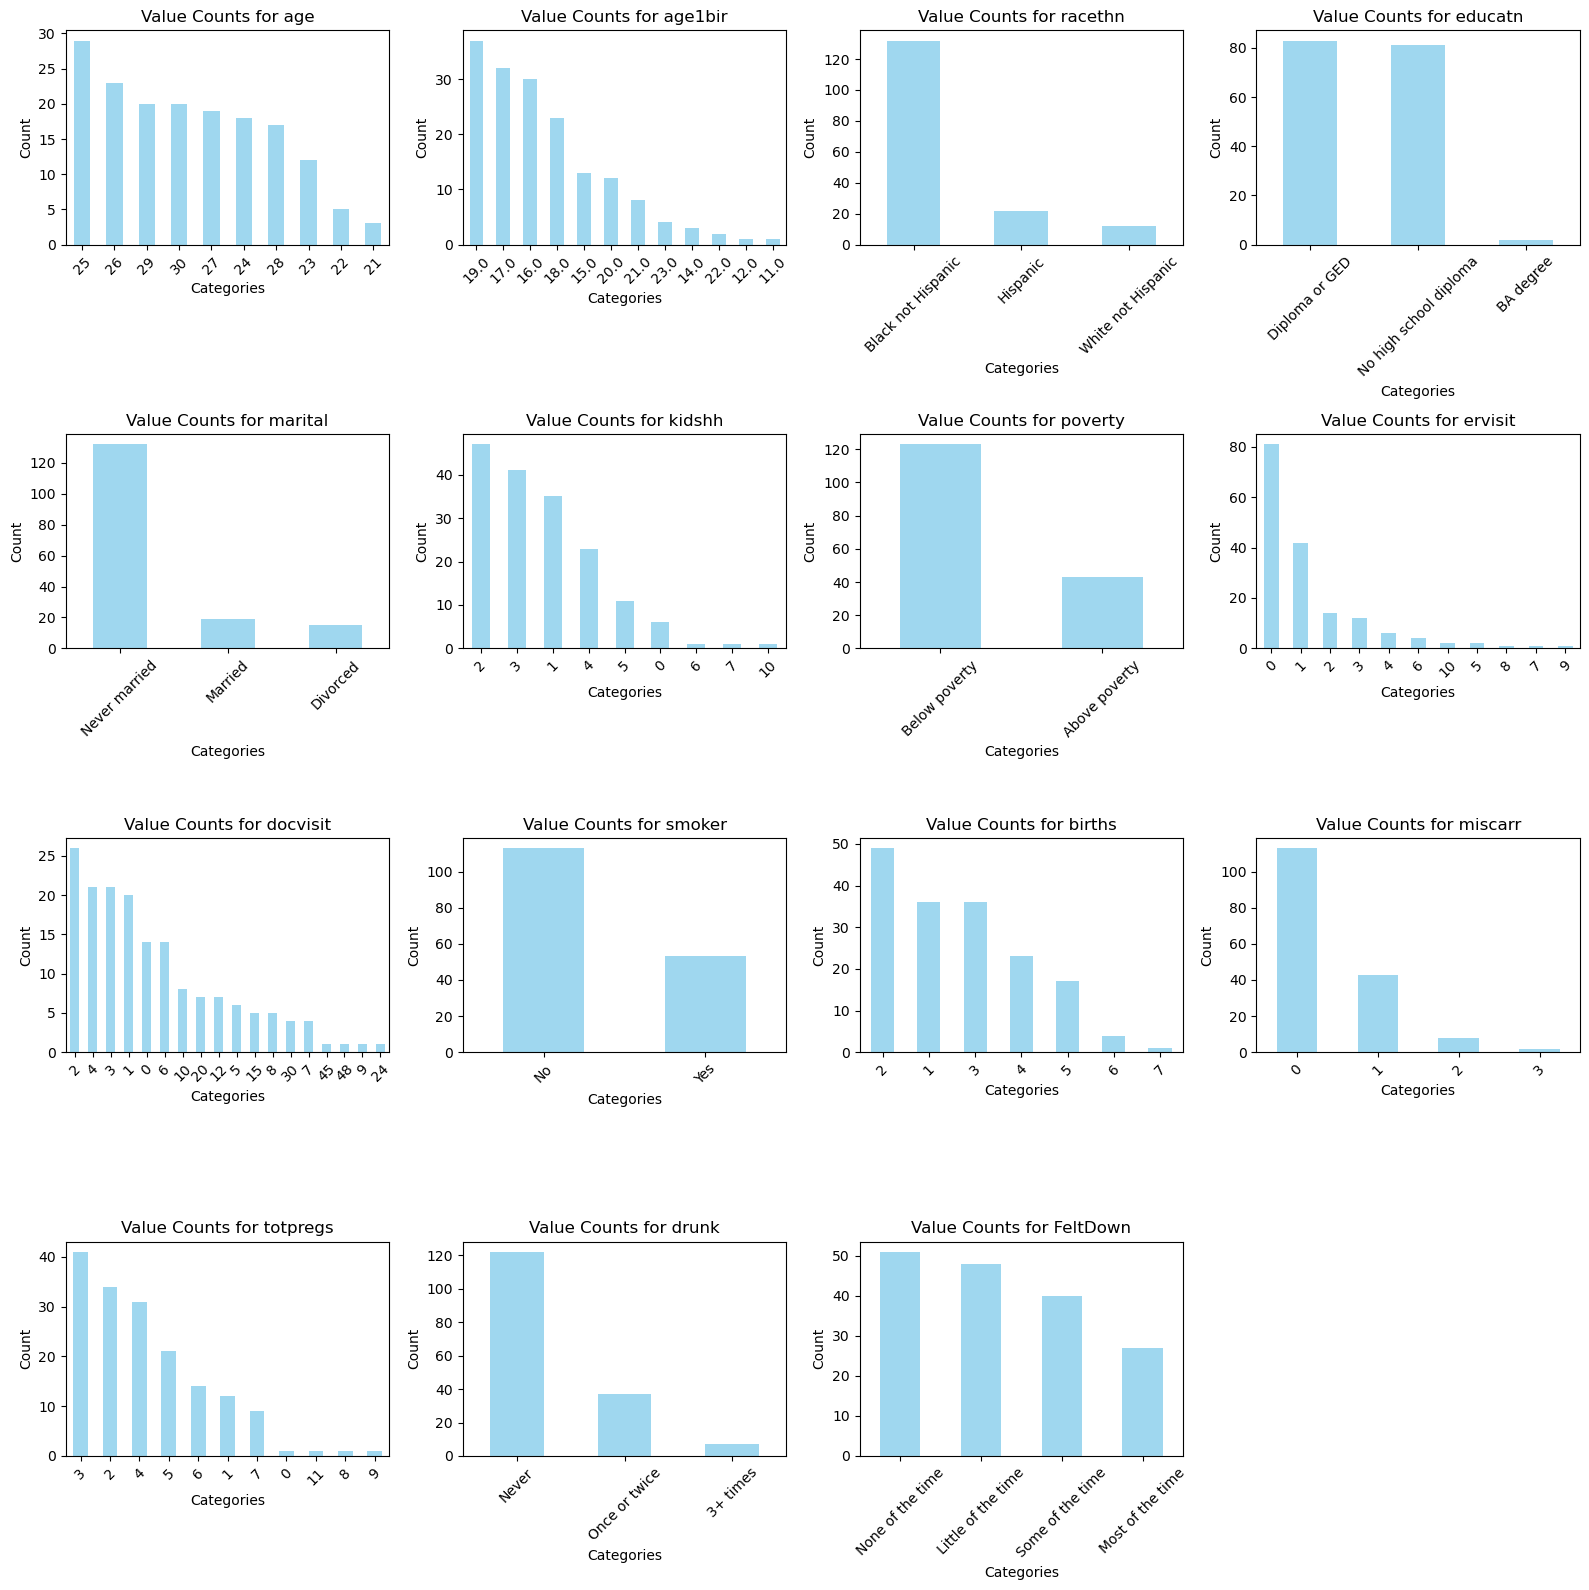

In [36]:
# Select Columns to use
column = ['age', 'age1bir', 'racethn', 'educatn', 'marital', 'kidshh', 'poverty',
           'ervisit', 'docvisit', 'smoker', 'births', 'miscarr', 'totpregs',
           'drunk', 'FeltDown']

# Execute function on desired data
generate_value_counts_and_plot(age_20_30, column)

# Plot graphs
plt.show()

#### Summarized Demographic Understanding
- About 166 individuals sampled were aged between 20 and 30 years    
- Of the sampled population aged between 20 and 30, most of the individuals are aged 25, 26, 29, 30, and 27 years in that order   
- Most of the individuals have their first birth at 19, 17, 16, and 18 years in that order
- Most are Black not Hispanic in race and ethnicity with a small section being White not Hispanic
- In terms of education, a majority possess a Diploma or GED and the second majority had no High School diploma. Only a small section has BA degree
- About marital status, most are never married. Those are married are equally divorced as seen in the graph
- Also, most have little number of children. In their respective order, most had 2, 3,1,4,and 5 kids in the order
- The analysis shows that a majority of individuals live below poverty
- The first five highest number of emergency visits among this sample are no visit, 1,2,3, and 4 respectively
- On the other hand, number of doctor visits are 2,4,3,1, no visit, and 6 with the highest visit being and the least 6 for the first five highest visits
- In regards to smoking, a majority of this sample are not smokers
- About drinking, most have drunk, a significant portion has at most drunk twice, with a smaller section having drunk at least thrice
- Out of those who have been pregnant, the case of miscarriage in decreasing order is none, 1,2 and 3 respectively
- The total number of pregnancy in decreasing order is 3,2,4,5,1, and 1 for the first six highest total pregnancies.
- In regards to falling down in a decreasing order, none felt, an equally number felt little of the time, a significant also felt down some of the time, and an insignificant number felt down most of the time. 


#### 2.2 Demographic Analysis of Sample age above 30 years  


In [37]:
#Number of individuals aged above 30 years 
age_above30.shape

(803, 18)

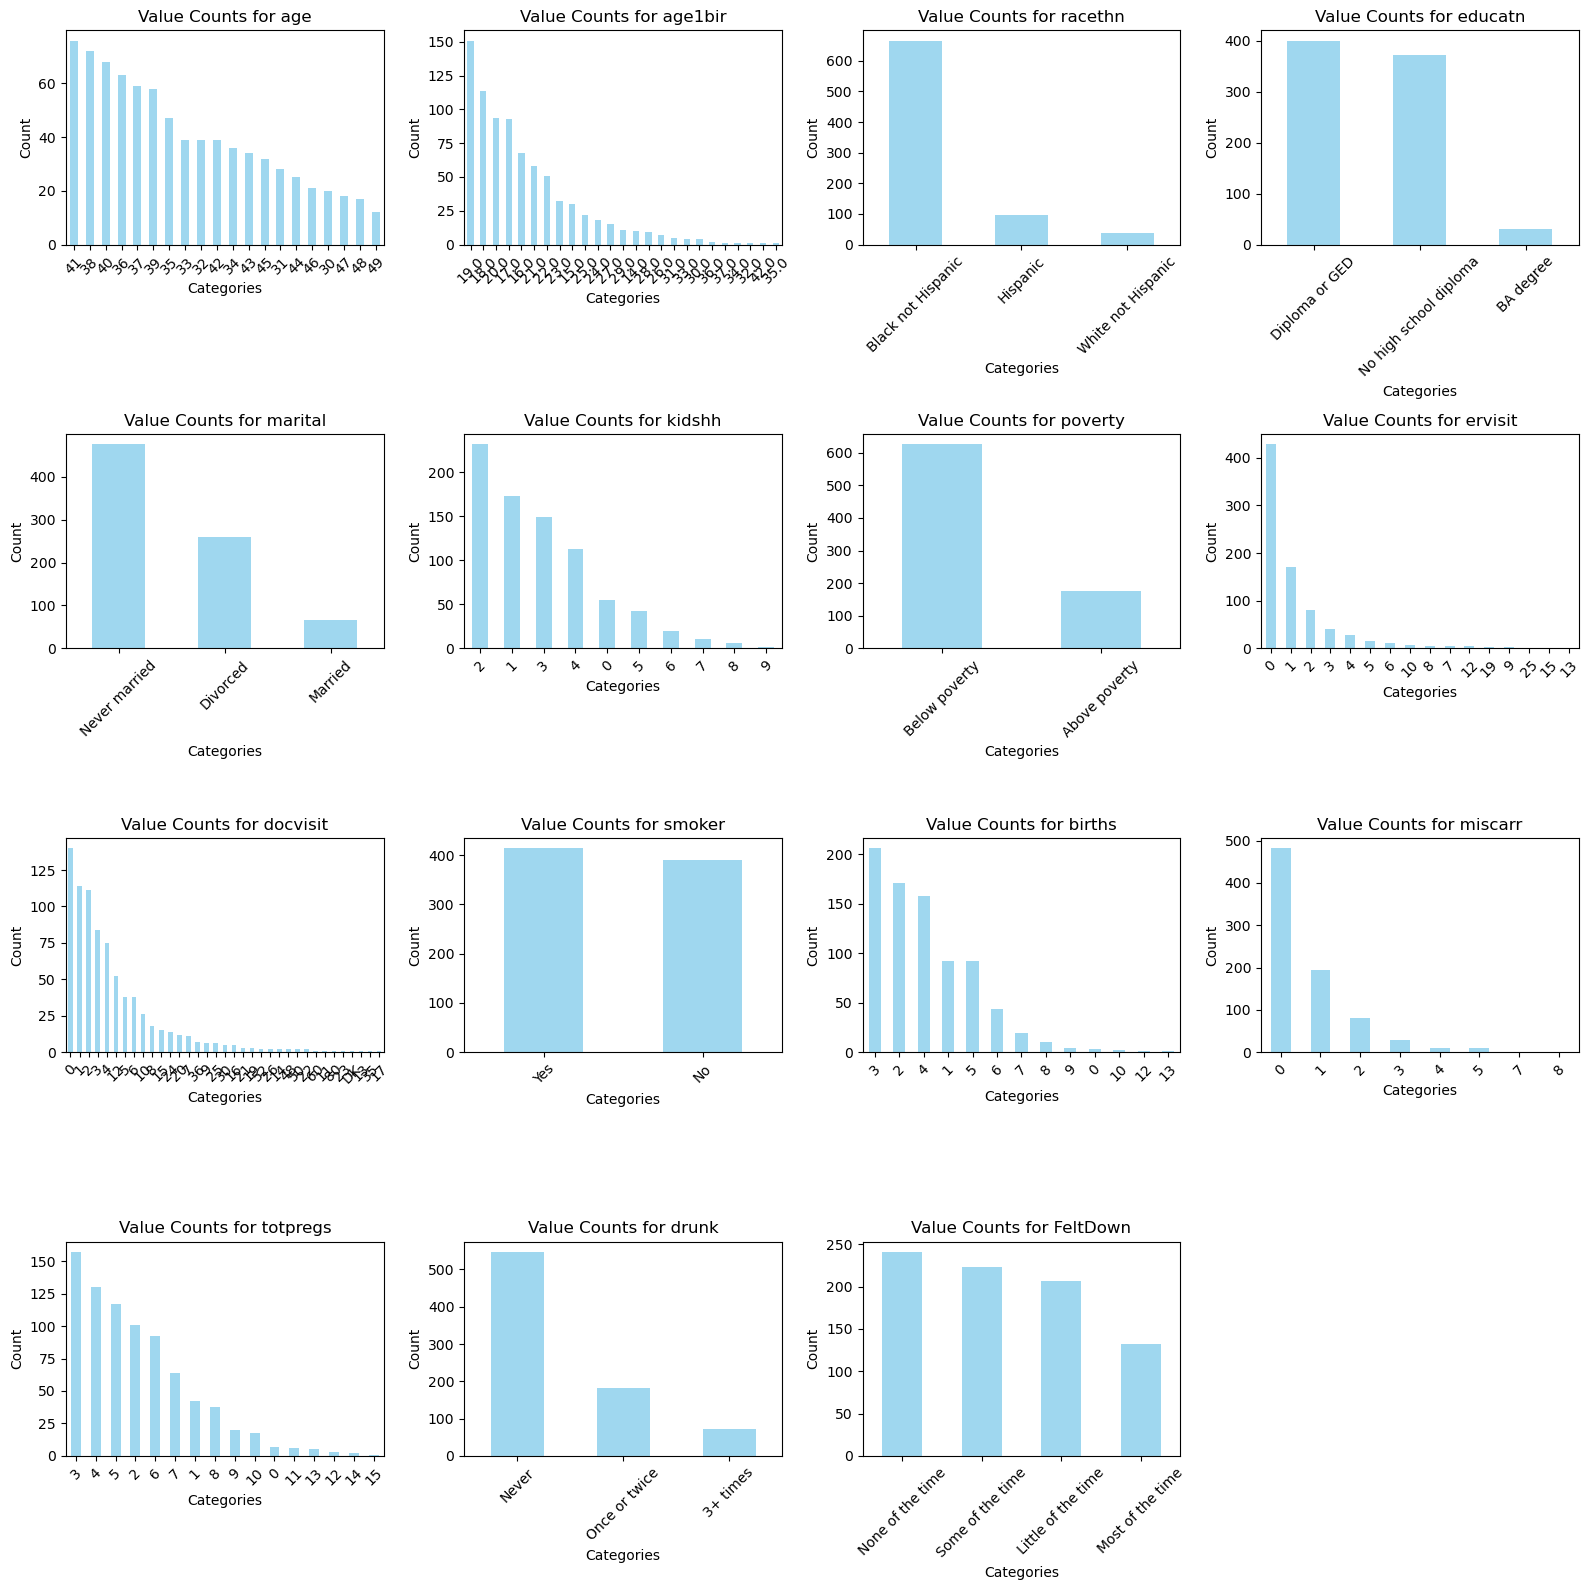

In [38]:
# Execute function on desired data
generate_value_counts_and_plot(age_above30, column)

# Plot graphs
plt.show()

###### Summarized Demographic Understanding
